# <center>Centro Universitário Facens<br/></center>
<br/>
<font size="4"><center><b>Ciência de Dados</b></center></font>
  
<font size="3"><center>Prof. Renato M. Silva</center></font>
<br/>

# <center>Exercício - Perceptron</center>

Instruções
----------

Este arquivo contém o código que auxiliará no desenvolvimento do exercício. Você precisará completar as seguintes funções:

* `perceptron()`
* `predicao()`

Você não poderá criar nenhuma outra função. Apenas altere as rotinas fornecidas.

## Introdução

Você foi contratado por uma grande empresa de cosméticos para desenvolver um método para classificar diferentes espécies de uma flor. Essencialmente, a empresa está interessada em separar automaticamente espécies de uma flor chamada Iris. Esse tipo de flor é composta por três espécies: **Setosa**, **Virginica** e **Versicolour**, apresentadas na Figura 1. As duas primeiras (Setosa e Virginica) possuem propriedades aromáticas de interesse da empresa, já a última (Versicolour) não pode ser utilizada.

Devido à forte semelhança visual entre elas, ocorreu a ideia de que, talvez, seja possível detectar cada espécie pelas medidas de comprimento e largura das pétalas. Com base nessa informação, a empresa criou duas base de dados pré-classificadas (Setosa + Versicolour e Virginica + Versicolour) com as respectivas medidas das pétalas das flores. A sua função é implementar o método Perceptron para determinar a espécie de uma Iris a partir dos dados das pétalas.

<br>
<br>

<center>
<div style="display:inline-block;">
    <div>
    <div style="padding: 5px; float: left;">
        <img src="figs/iris_setosa.jpeg" style="height:180px;"/>
        <center><em>(a) Setosa</em></center>
    </div>
    <div style="padding: 5px; float: left;">
        <img src="figs/iris_virginica.jpeg"  style="height:180px;"/>
        <center><em>(b) Virginica</em></center>
    </div>
    <div style="padding: 5px; float: left;">
        <img src="figs/iris_versicolour.jpeg"  style="height:180px;"/>
        <center><em>(c) Versicolour</em></center>
    </div>
    </div>
    <center><em>Figura 1. Espécies de Iris.</em></center>
</div>
</center>



## Parte 1: Visualização dos dados

Muitas vezes, a visualização dos dados auxilia na interpretação dos mesmos
e como eles estão distribuídos. Nesta etapa, você precisa completar a
função de normalização dos atributos ( <tt>normalizacao()</tt> ).

Primeiro, vamos carregar os dados do arquivo.

In [1]:
# -*- coding: utf-8 -*-

import numpy as np #importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd #importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
import os # importa a biblioteca para tarefas relacionadas ao sistema operacional

# Importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv('dados/dados.csv', sep=',', index_col=None)

print('Dados carregados com sucesso!')

Dados carregados com sucesso!


Agora, vamos dar uma olhada nas cinco primeiras amostras da base de dados.

In [2]:
# vamos usar a função display para imprimir o dataframe.
# Obs: poderíamos ter usado a função print: print(df_dataset.head(n=5))
display(df_dataset.head(n=5))

,largura_petala,comprimento_petala,classe
0,4.9,3.1,0
1,4.4,3.0,0
2,5.7,4.4,0
3,5.5,4.2,0
4,4.9,3.1,0


Agora, vamos guardar os dados dentro de uma matriz e as classes dentro de um vetor. As cinco primeiras linhas da matriz de dados e do vetor de classes serão exibidos.

In [3]:
# Pega os valores das n-1 primeiras colunas e guarda em uma matrix X
X = df_dataset.iloc[:, 0:-1].values

# Pega os valores da ultima coluna e guarda em um vetor Y
Y = df_dataset.iloc[:, -1].values

# Imprime as 5 primeiras linhas da matriz X
display('X:', X[0:5,:])

# Imprime os 5 primeiros valores de Y
print('Y:', Y[0:5])

'X:'

array([[4.9, 3.1],
       [4.4, 3. ],
       [5.7, 4.4],
       [5.5, 4.2],
       [4.9, 3.1]])

Y: [0 0 0 0 0]


Agora, vamos criar uma função para plotar os dados.

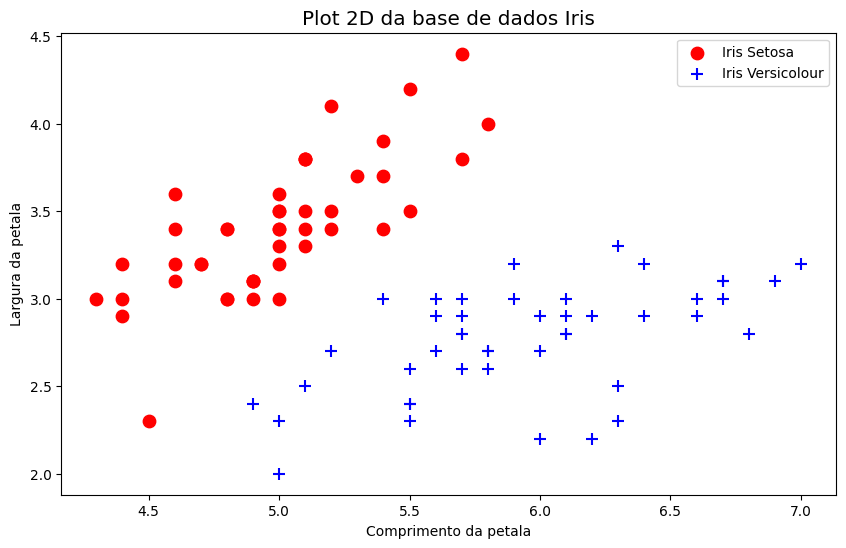

In [4]:
# Importando a biblioteca matplotlib
import matplotlib.pyplot as plt

# Criando a função para plotar os dados
def visualizarDados(X,Y, nome_classe0, nome_classe1):
    """
    Função usada para plotar os dados
    """

    # definindo o tamanho da figura
    plt.figure(figsize=(10,6))

    # plota os dados da classe 0
    plt.scatter( X[Y==0,0], X[Y==0,1], label=nome_classe0, marker='o', color='red', s=80)

    # plota os dados da classe 1
    plt.scatter( X[Y==1,0], X[Y==1,1], label=nome_classe1, marker='+', color='blue', s=80)

    # define os nomes dos eixos x e y
    plt.xlabel(r'Comprimento da petala',fontsize='medium')
    plt.ylabel(r'Largura da petala',fontsize='medium')

    # plota a legenda
    plt.legend()

    # define o título do gráfico
    plt.title('Plot 2D da base de dados Iris', fontsize='x-large')

# Chamando a função que plota os dados
visualizarDados(X,Y, 'Iris Setosa', 'Iris Versicolour')

# exibe o grafico
plt.show()

## Implementação da método Perceptron

Implemente o método Perceptron em aplique na base de dados fornecida. Separe 80\% da base de dados para treinamento e teste nos 20% restantes.

---
Antes de implementar o Perceptron, vamos separar os dados em treino (80%) e teste (20%).

In [5]:
# define a porcentagem de treinamento
porcTrain = 0.8

# vamos usar uma semente para que sempre separe igualmente
randomSeed = 20

# embaralha os indices
permutedIndexes = np.random.RandomState(randomSeed).permutation( X.shape[0] )

# embaralha os dados com base nos indices embaralhados
X_shuffled, Y_shuffled = X[permutedIndexes,:], Y[permutedIndexes]

# separa em treino e teste
qtdTreino = int(X_shuffled.shape[0]*0.8)
X_train, Y_train = X_shuffled[0:qtdTreino,:], Y_shuffled[0:qtdTreino]
X_test, Y_test = X_shuffled[qtdTreino:,:], Y_shuffled[qtdTreino:]

print('Qtd. dados de treinamento: %d (%1.2f%%)' %(X_train.shape[0], (X_train.shape[0]/X.shape[0])*100) )
print('Qtd. de dados de teste: %d (%1.2f%%)' %(X_test.shape[0], (X_test.shape[0]/X.shape[0])*100) )

print(X[0:5,:])

Qtd. dados de treinamento: 72 (80.00%)
Qtd. de dados de teste: 18 (20.00%)
[[4.9 3.1]
 [4.4 3. ]
 [5.7 4.4]
 [5.5 4.2]
 [4.9 3.1]]


Agora, vamos mudar os Y para o intervalo -1 a 1, para ser fiel ao algoritmo original do Perceptron.

In [6]:
Y_train[ Y_train==0 ] = -1
Y_test[ Y_test==0 ] = -1

print("Classes Y_train: ", np.unique(Y_train) )
print("Classes Y_test: ", np.unique(Y_test) )

Classes Y_train:  [-1  1]
Classes Y_test:  [-1  1]


Agora você deve completar o código do Perceptron.

In [7]:
def Perceptron(X, Y, learnRate):

    # Qtde de amostras
    m = X.shape[0]

    # para facilitar, vamos adicionar uma coluna de 1s no X para
    # multiplicar pelo bias
    X = np.hstack([np.ones([m,1]), X])

    # Vamos inicializar os pesos w com valor 0.
    # O vetor w precisa ter uma quantidade de elementos igual ao
    # numero de atributos de X
    # Lembre-se que adicionamos uma coluna 1 no X. O vetor w,
    # tambem tera um valor a mais, pois para facilitar
    # vamos inserir o bias na primeira posicao de W.
    w = np.zeros(X.shape[1])

    # definindo uma quantidade maxima de iteracoes
    maxEpocas = 1000

    taxaErro = 1.0 # inicializando a taxa de erro. Esse valor deve ser atualizado pela rede em cada epoca
    minTaxaErro = 0.0 # defini a taxa minima de erro
    historicoErro = [] # inicializa uma lista que deve guardar o erro em cada epoca
    iEpoca = 0 # inicializa o indice da epoca atual

    while taxaErro > minTaxaErro and iEpoca < (maxEpocas-1):

        # imprimi o numero de epoca a cada 50 iteracoes
        if (iEpoca+1) % 50 == 1:
            print("Epoca: %d" % (iEpoca))

        erro_epoca = 0

        for i in range(m):
            y = 1 if np.dot(w, X[i]) > 0 else -1
            e = Y[i] - y
            w = w + learnRate * e * X[i]
            erro_epoca += np.abs(e)

        taxaErro = erro_epoca / (2 * m)

        historicoErro.append(taxaErro)

        iEpoca += 1

    return w, historicoErro

# usando os dados para treinar o Perceptron

# defini a taxa de aprendizado
learnRate = 0.001

# treina o Perceptron
w, historicoErro = Perceptron( X_train, Y_train, learnRate )

print("\nTreinamento do Perceptron concluido")

print('\nErro esperado na ultima epoca: 0.00')
print('Erro encontrado na ultima epoca: %1.2f' %(historicoErro[-1]))

print('\n\nPesos finais esperados = [-0.1, 0.095, -0.143]')
print('\nPesos finais encontrados = ')
print( np.round(w,3) )

Epoca: 0
Epoca: 50
Epoca: 100
Epoca: 150

Treinamento do Perceptron concluido

Erro esperado na ultima epoca: 0.00
Erro encontrado na ultima epoca: 0.00


Pesos finais esperados = [-0.1, 0.095, -0.143]

Pesos finais encontrados = 
[-0.1    0.095 -0.143]


Vamos plotar os valores dos erros ao longo das épocas de treinamento.

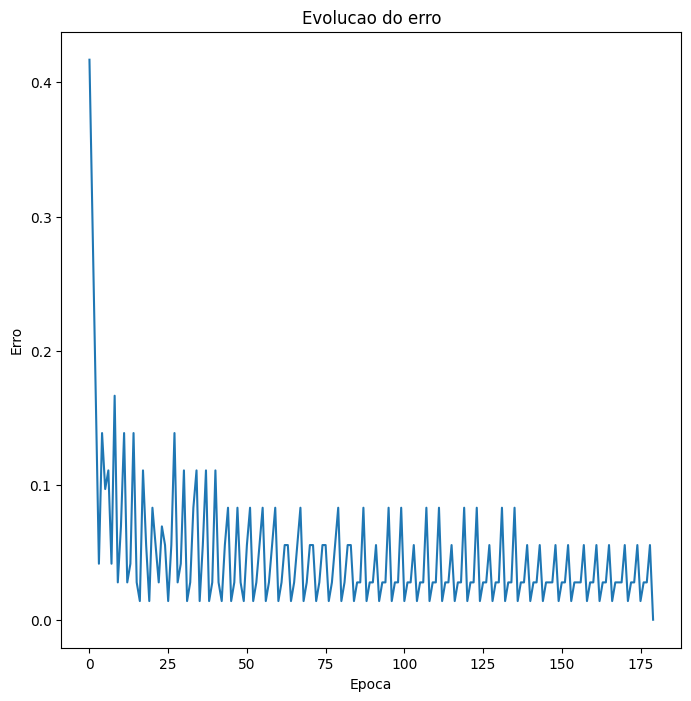

In [8]:
# define o tamanho da figura
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(historicoErro)

ax.set_title("Evolucao do erro", fontsize='large')

# define os nomes dos eixos x e y
plt.xlabel(r'Epoca',fontsize='medium')
plt.ylabel(r'Erro',fontsize='medium')
plt.show()

Agora, vamos testar os pesos aprendidos pelo Perceptron na classificação dos dados de teste.

In [9]:
def predicao(w, X):
    """
    Faz a predicao das amostras
    com base nos pesos recebidos como parametro
    """

    # Qtde de amostras
    m = X.shape[0]

    # para facilitar, vamos adicionar uma coluna de 1s no X para
    # multiplicar pelo bias
    X = np.hstack( [np.ones([m,1]),X] )

    # Você precisa retornar um vetor com as classes preditas
    Y_pred = np.zeros(m, dtype=int)

    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Instrucoes: Complete o codigo a seguir para fazer predicoes usando
    # os pesos ajustados pele Perceptron.
    # Y_pred devera ser um vetor composto somente por 1's e -1's


    for i in range(m):
        # Calcula o valor do perceptron para a amostra i
        net_input = np.dot(w, X[i])

        # Aplica a função de ativação (step function)
        if net_input >= 0:
            Y_pred[i] = 1
        else:
            Y_pred[i] = -1


    ##########################################################################

    return Y_pred


# faz a predicao dos dados de teste
Y_pred = predicao(w, X_test)

# vamos calcular a acuracia (porcentagem de acerto)
acuracia = np.sum( Y_pred == Y_test) / len(Y_test)

print('Acuracia esperada = 0.94')
print("Acuracia encontrada: %1.2f" %acuracia)

Acuracia esperada = 0.94
Acuracia encontrada: 0.94


Vamos criar uma funcao para plotar a superfície de decisão criada pelo Perceptron.

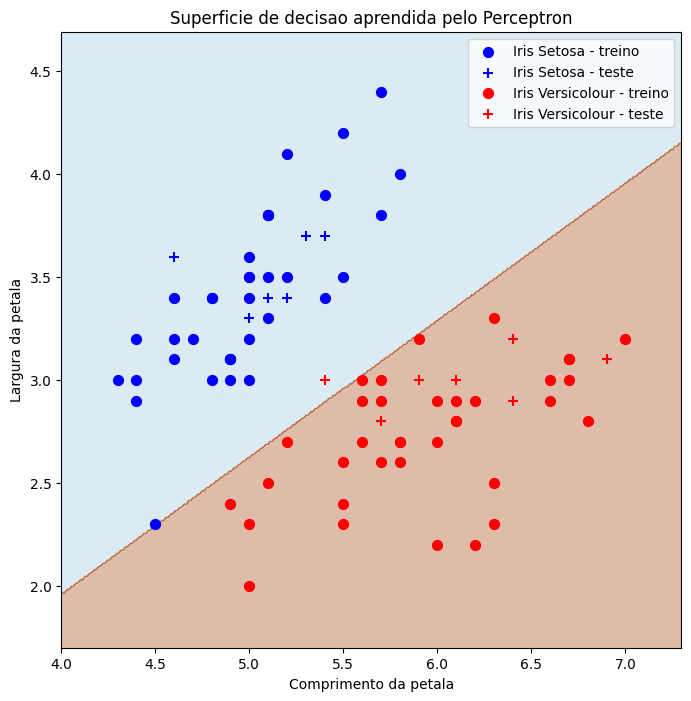

In [10]:
def plota_superficieDecisao(X_train, Y_train, X_test, Y_test, w, ax, title = "", nome_classe0 = "", nome_classe1 = ""):
    h = .008  # tamanho do passo da malha (mesh)

    # cria uma malha (mesh)
    x_min, x_max = X_train[:, 0].min() - 0.3, X_train[:, 0].max() + 0.3
    y_min, y_max = X_train[:, 1].min() - 0.3, X_train[:, 1].max() + 0.3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    X_testGrid = np.c_[xx.ravel(), yy.ravel()]
    Z = predicao(w, X_testGrid)

    # converte os valores do vetor para indices
    Z2 = np.unique(Z, return_inverse=True)[1]

    # plota a superficie de decisao
    Z2 = Z2.reshape(xx.shape)
    ax.contourf(xx, yy, Z2, cmap=plt.cm.Paired, alpha=.4)

    # converte os valores do vetor para indices
    Y2_train = np.unique(Y_train, return_inverse=True)[1]

    # plota os dados da classe -1
    plt.scatter( X_train[Y_train==-1,0], X_train[Y_train==-1,1], label=nome_classe0 + " - treino", marker='o', color='blue', s=50)
    plt.scatter( X_test[Y_test==-1,0], X_test[Y_test==-1,1], label=nome_classe0 + " - teste", marker='+', color='blue', s=50)

    # plota os dados da classe 1
    plt.scatter( X_train[Y_train==1,0], X_train[Y_train==1,1], label=nome_classe1 + " - treino", marker='o', color='red', s=50)
    plt.scatter( X_test[Y_test==1,0], X_test[Y_test==1,1], label=nome_classe1 + " - teste", marker='+', color='red', s=50)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title, fontsize='large')

    # define os nomes dos eixos x e y
    plt.xlabel(r'Comprimento da petala',fontsize='medium')
    plt.ylabel(r'Largura da petala',fontsize='medium')

    # plota a legenda
    plt.legend()


# define o tamanho da figura
fig, ax = plt.subplots(figsize=(8, 8))

# chama a funcao para plotar a superficie de decisao juntamente com os dados de treinamento
tituloGrafico = "Superficie de decisao aprendida pelo Perceptron"
nomeClasse0 = 'Iris Setosa'
nomeClasse1 = 'Iris Versicolour'
plota_superficieDecisao(X_train, Y_train, X_test, Y_test, w, ax, title = tituloGrafico, nome_classe0 = nomeClasse0, nome_classe1 = nomeClasse1)

plt.show()